In [1]:
# Install the Kaggle package
!pip install -q kaggle

# Create the directory for storing Kaggle credentials
import os
os.makedirs("/root/.kaggle", exist_ok=True)

# Move the kaggle.json file to the correct location
!mv kaggle.json /root/.kaggle/

# Set the permissions for the credentials file
!chmod 600 /root/.kaggle/kaggle.json


In [3]:
!kaggle datasets download -d ardamavi/27-class-sign-language-dataset

Dataset URL: https://www.kaggle.com/datasets/ardamavi/27-class-sign-language-dataset
License(s): CC-BY-NC-SA-4.0
 99% 1.05G/1.06G [00:13<00:00, 139MB/s]
100% 1.06G/1.06G [00:13<00:00, 82.2MB/s]


In [4]:
!unzip -q 27-class-sign-language-dataset.zip

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [6]:
import os

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

X = np.load('./X.npy')
Y = np.load('./Y.npy')

X.shape

(22801, 128, 128, 3)

In [15]:
# Reduce the dataset size (example: take only the first 1000 samples)
X = X[:100]
Y = Y[:100]

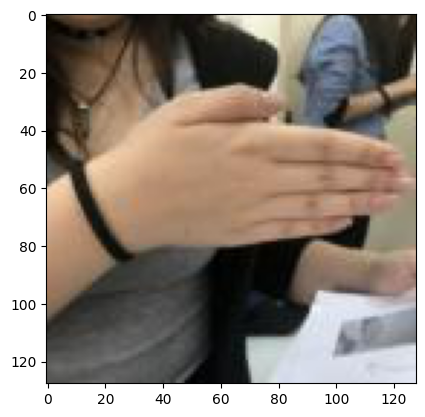

In [4]:
plt.imshow(X[0])

In [5]:
9 - np.argmax(Y[0])


9

In [18]:
X_flat = X.reshape((X.shape[0], -1))
# Reshape X to have the number of samples as the first dimension and flatten the rest.
# X.shape[0] gives the number of samples (100 in this case).
# -1 automatically calculates the remaining dimension to ensure all elements are included.

X_train, X_test, y_train, y_test = train_test_split(X_flat, Y, test_size=0.3, random_state=42)

In [20]:
pca_dims = PCA()
pca_dims.fit(X_train)
cumsum = np.cumsum(pca_dims.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [21]:
d

45

#PCA

In [22]:
pca = PCA(n_components=d)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

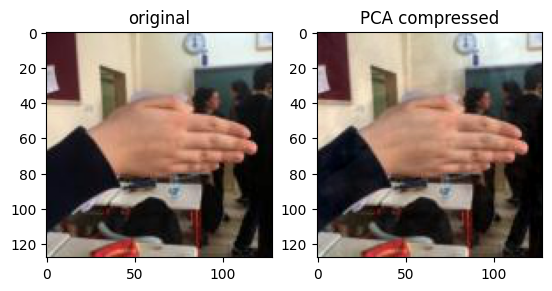

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming original image was 128x128 with 3 channels:
f = plt.figure()
f.add_subplot(1, 2, 1)
plt.title("original")
plt.imshow(X_train[0].reshape((128, 128, 3))) # Reshape to the correct dimensions
f.add_subplot(1, 2, 2)

plt.title("PCA compressed")
plt.imshow(X_recovered[0].reshape((128, 128, 3))) # Reshape to the correct dimensions
plt.show(block=True)


# If the original image was grayscale and you know the dimensions (e.g., 128x384):
#f = plt.figure()
#f.add_subplot(1, 2, 1)
#plt.title("original")
#plt.imshow(X_train[0].reshape((128, 384)), cmap='gray')  # Use cmap='gray' for grayscale
#f.add_subplot(1, 2, 2)
#plt.title("PCA compressed")
#plt.imshow(X_recovered[0].reshape((128, 384)), cmap='gray') # Use cmap='gray' for grayscale
#plt.show(block=True)

#Kernel PCA

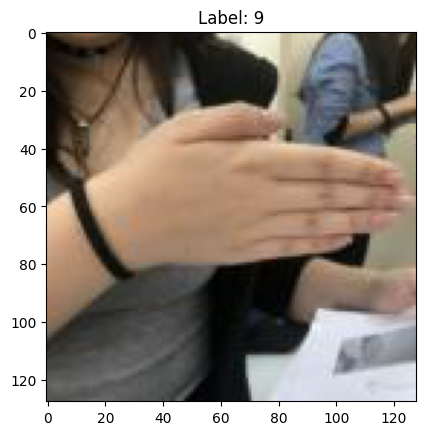

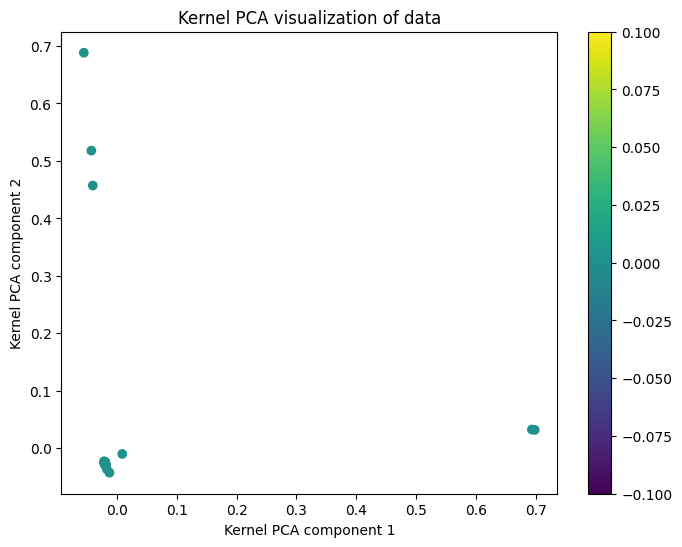

Accuracy: 100.00%
Confusion Matrix:
 [[30]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [39]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import KernelPCA  # Import KernelPCA

from sklearn.preprocessing import StandardScaler # Import StandardScaler for data scaling



# Show an example image
plt.imshow(X[0])
plt.title(f"Label: {9 - np.argmax(Y[0])}")
plt.show()

# Flatten the data for dimensionality reduction (required by most dimensionality reduction techniques)
X_flat = X.reshape((X.shape[0], -1))  # Flatten each image into a 1D array

# Scale the data before applying KernelPCA
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # Fit the scaler on the training data and transform
X_test = scaler.transform(X_test) # Transform the test data using the fitted scaler

# KernelPCA with RBF kernel (you can change the kernel type)
# Reduced gamma significantly
kpca = KernelPCA(kernel="rbf", gamma=0.001, n_components=2)  # gamma is a parameter for the RBF kernel, experiment with reducing this value
X_reduced = kpca.fit_transform(X_train)

# Visualize the Kernel PCA results in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=np.argmax(y_train, axis=1), cmap='viridis')
plt.colorbar()
plt.title("Kernel PCA visualization of data")
plt.xlabel("Kernel PCA component 1")
plt.ylabel("Kernel PCA component 2")
plt.show()

# Optionally, you can train a classifier like MLPClassifier on the reduced features
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train, np.argmax(y_train, axis=1))  # Training the model

# Evaluate the classifier
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print("Confusion Matrix:\n", conf_matrix)



#t-SNE

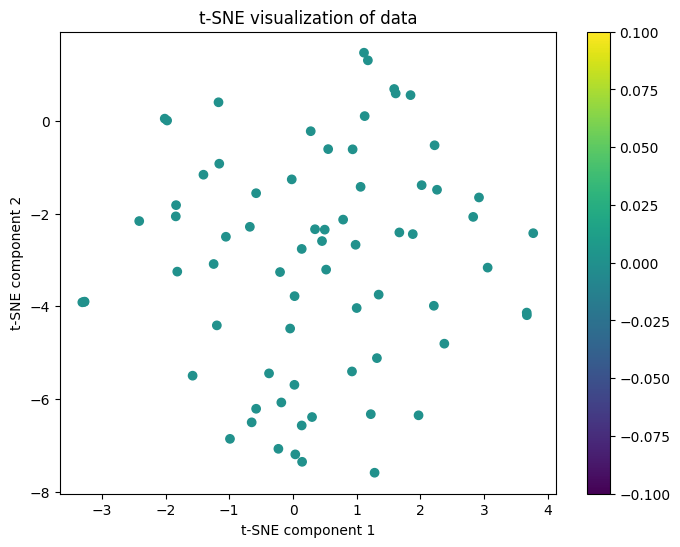

Accuracy: 100.00%
Confusion Matrix:
 [[30]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [27]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.manifold import TSNE  # Import TSNE
# Use t-SNE to reduce the dimensionality of the data
tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2 dimensions for visualization
X_tsne = tsne.fit_transform(X_train)  # Fit and transform the training data

# Visualize the t-SNE results in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=np.argmax(y_train, axis=1), cmap='viridis')
plt.colorbar()
plt.title("t-SNE visualization of data")
plt.xlabel("t-SNE component 1")
plt.ylabel("t-SNE component 2")
plt.show()

# Optionally, you can train a classifier like MLPClassifier on the reduced features
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train, np.argmax(y_train, axis=1))  # Training the model

# Evaluate the classifier
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print("Confusion Matrix:\n", conf_matrix)

In [28]:
!pip install umap-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.7 MB/s eta 0:00:00


#UMAP

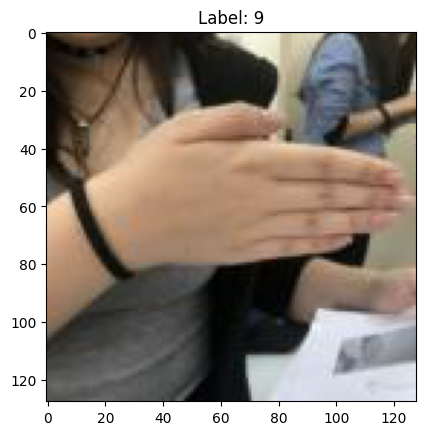

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


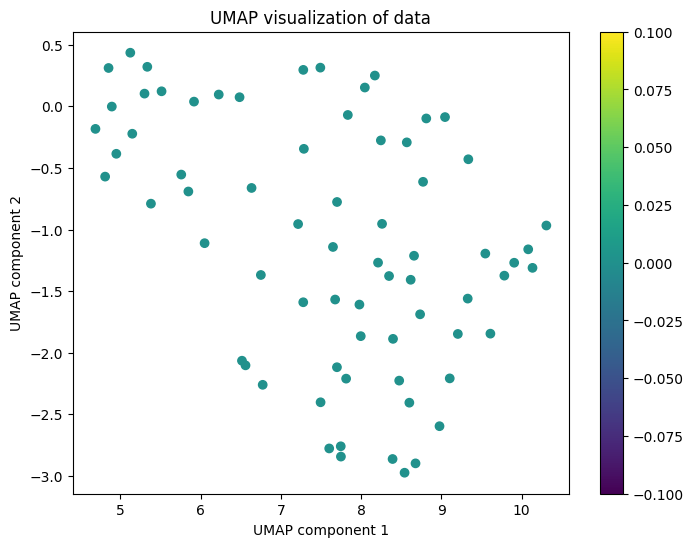

Accuracy: 100.00%
Confusion Matrix:
 [[30]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [30]:
import umap  # Import UMAP
# Show an example image
plt.imshow(X[0])
plt.title(f"Label: {9 - np.argmax(Y[0])}")
plt.show()

# Flatten the data for dimensionality reduction (required by most dimensionality reduction techniques)
X_flat = X.reshape((X.shape[0], -1))  # Flatten each image into a 1D array

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_flat, Y, test_size=0.3, random_state=42)

# Use UMAP to reduce the dimensionality of the data
umap_model = umap.UMAP(n_components=2, random_state=42)  # Reduce to 2 dimensions for visualization
X_umap = umap_model.fit_transform(X_train)  # Fit and transform the training data

# Visualize the UMAP results in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=np.argmax(y_train, axis=1), cmap='viridis')
plt.colorbar()
plt.title("UMAP visualization of data")
plt.xlabel("UMAP component 1")
plt.ylabel("UMAP component 2")
plt.show()

# Optionally, you can train a classifier like MLPClassifier on the reduced features
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train, np.argmax(y_train, axis=1))  # Training the model

# Evaluate the classifier
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print("Confusion Matrix:\n", conf_matrix)

#Randomized PCA

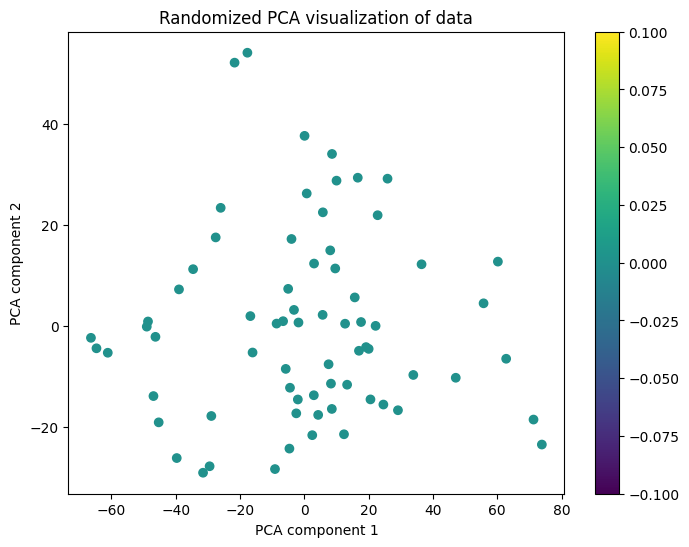

Accuracy: 100.00%
Confusion Matrix:
 [[30]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [32]:
from sklearn.decomposition import PCA  # Import PCA


# Flatten the data for dimensionality reduction (required by most dimensionality reduction techniques)
X_flat = X.reshape((X.shape[0], -1))  # Flatten each image into a 1D array

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_flat, Y, test_size=0.3, random_state=42)

# Use Randomized PCA to reduce the dimensionality of the data
pca_model = PCA(n_components=2, svd_solver='randomized', random_state=42)  # Reduce to 2 dimensions for visualization
X_pca = pca_model.fit_transform(X_train)  # Fit and transform the training data

# Visualize the Randomized PCA results in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=np.argmax(y_train, axis=1), cmap='viridis')
plt.colorbar()
plt.title("Randomized PCA visualization of data")
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.show()

# Optionally, you can train a classifier like MLPClassifier on the reduced features
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train, np.argmax(y_train, axis=1))  # Training the model

# Evaluate the classifier
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print("Confusion Matrix:\n", conf_matrix)